In [ ]:
import pandas as pd
from google.colab import files
files.upload()

df = pd.read_csv('PHQ-9_Dataset_5th Edition.csv')
print(df)

Saving PHQ-9_Dataset_5th Edition.csv to PHQ-9_Dataset_5th Edition.csv
     Age  Gender Little interest or pleasure in doing things   \
0     22    Male                      More than half the days   
1     25    Male                                   Not at all   
2     22  Female                                   Not at all   
3     18  Female                             Nearly every day   
4     24    Male                                   Not at all   
..   ...     ...                                          ...   
677   20    Male                      More than half the days   
678   19    Male                             Nearly every day   
679   23    Male                                   Not at all   
680   19    Male                                   Not at all   
681   21    Male                             Nearly every day   

      Feeling down, depressed, or hopeless    \
0                                 Not at all   
1                                 Not at all   
2    

In [ ]:
#duplikasi data
phq9_copy = df.copy()

In [ ]:
df.shape
df.info()
phq9_copy.isnull().sum() #cek missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                    --------------  ----- 
 0   Age                                                                                                                                                                       682 non-null    int64 
 1   Gender                                                                                                                                                                    682 non-null    object
 2   Little interest or pleasure in doing things                                                       

,0
Age,0
Gender,0
Little interest or pleasure in doing things,0
"Feeling down, depressed, or hopeless",0
"Trouble falling or staying asleep, or sleeping too much",0
Feeling tired or having little energy,0
Poor appetite or overeating,0
Feeling bad about yourself—or that you are a failure or have let yourself or your family down,0
"Trouble concentrating on things, such as reading the newspaper or watching television",0
Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual,0


In [ ]:
#menghapus kolom yang tidak diperlukan
phq9_copy = df.copy()
phq9_copy = phq9_copy.drop(phq9_copy.columns[2:12], axis=1)
print(phq9_copy)

     Age  Gender       PHQ_Severity Sleep Quality Study Pressure  \
0     22    Male            Minimal          Good           Good   
1     25    Male  Moderately severe         Worst            Bad   
2     22  Female            Minimal       Average            Bad   
3     18  Female           Moderate       Average            Bad   
4     24    Male            Minimal          Good        Average   
..   ...     ...                ...           ...            ...   
677   20    Male  Moderately severe           Bad            Bad   
678   19    Male             Severe         Worst          Worst   
679   23    Male               Mild           Bad           Good   
680   19    Male            Minimal       Average        Average   
681   21    Male  Moderately severe       Average            Bad   

    Financial Pressure  
0              Average  
1              Average  
2              Average  
3                Worst  
4                 Good  
..                 ...  
677     

In [ ]:
# Mapping PHQ_Severity ke nilai integer
severity_mapping = {
    'Minimal': 1,
    'Mild': 2,
    'Moderate': 3,
    'Moderately severe': 4,
    'Severe': 5
}

# Melakukan mapping pada kolom 'PHQ_Severity'
phq9_copy['PHQ_Severity'] = phq9_copy['PHQ_Severity'].map(severity_mapping)
print(phq9_copy)

     Age  Gender  PHQ_Severity Sleep Quality Study Pressure Financial Pressure
0     22    Male             1          Good           Good            Average
1     25    Male             4         Worst            Bad            Average
2     22  Female             1       Average            Bad            Average
3     18  Female             3       Average            Bad              Worst
4     24    Male             1          Good        Average               Good
..   ...     ...           ...           ...            ...                ...
677   20    Male             4           Bad            Bad                Bad
678   19    Male             5         Worst          Worst              Worst
679   23    Male             2           Bad           Good               Good
680   19    Male             1       Average        Average                Bad
681   21    Male             4       Average            Bad                Bad

[682 rows x 6 columns]


In [ ]:
#Distribusi Gender
gender_counts = df["Gender"].value_counts()
print(gender_counts)

Gender
Male      418
Female    264
Name: count, dtype: int64


In [ ]:
# Memfilter gender 'Male' dari DataFrame phq9_copy yang sudah dimodifikasi
phq9_copy_male = phq9_copy[phq9_copy['Gender'] == 'Male']
print(phq9_copy_male.head())

    Age Gender  PHQ_Severity Sleep Quality Study Pressure Financial Pressure
0    22   Male             1          Good           Good            Average
1    25   Male             4         Worst            Bad            Average
4    24   Male             1          Good        Average               Good
5    19   Male             1          Good           Good               Good
11   19   Male             1           Bad           Good                Bad


In [ ]:
median_age_male= phq9_copy_male['Age'].median()
print(median_age_male)

21.0


In [ ]:
most_frequent_severity = df['PHQ_Severity'].value_counts()
print(most_frequent_severity)

PHQ_Severity
Minimal              206
Mild                 155
Moderate             128
Moderately severe    125
Severe                68
Name: count, dtype: int64


In [ ]:
#Menghitung rata-rata PHQ_Total untuk setiap kategori faktor dari data laki-laki yang sudah difilter
sleep_phq = phq9_copy_male.groupby('Sleep Quality')['PHQ_Severity'].mean().sort_values()
study_phq = phq9_copy_male.groupby('Study Pressure')['PHQ_Severity'].mean().sort_values()
finance_phq = phq9_copy_male.groupby('Financial Pressure')['PHQ_Severity'].mean().sort_values()

#Distribusi Resiko
risk = {
    'Sleep Quality': sleep_phq.max() - sleep_phq.min(),
    'Study Pressure': study_phq.max() - study_phq.min(),
    'Financial Pressure': finance_phq.max() - finance_phq.min()
}
pd.Series(risk).sort_values(ascending=False)

,0
Study Pressure,2.359699
Sleep Quality,2.073432
Financial Pressure,1.395082


In [ ]:
#menyimpan file baru
phq9_copy_male.to_csv("PHQ-9 Analysis.csv"  , index=False) #index = false itu akan hilang di file csv nya


**VISUALISASI**

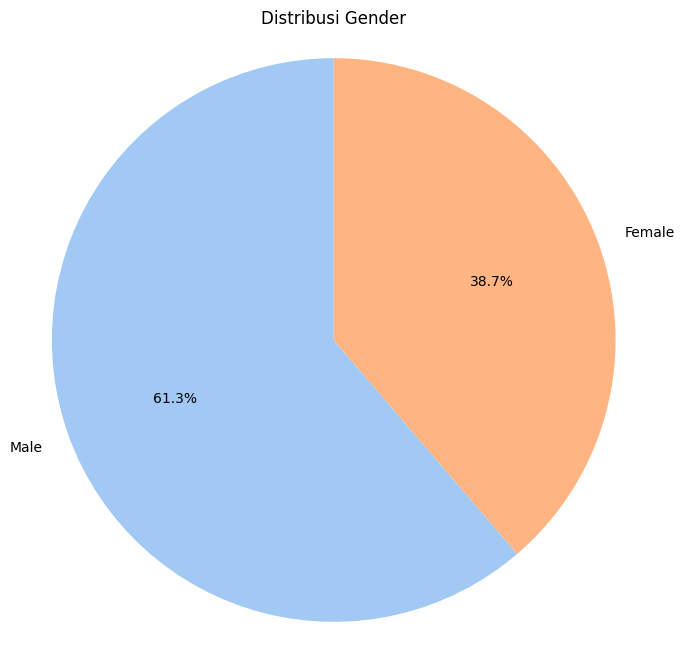

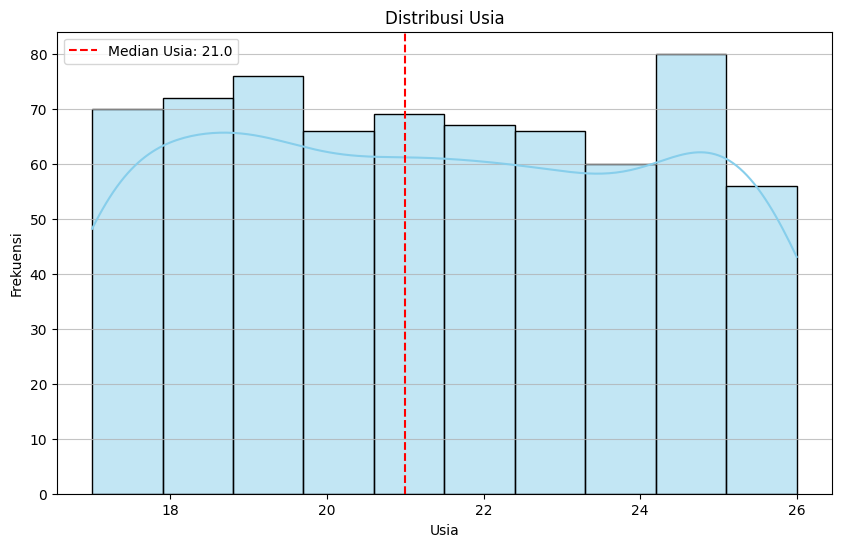

/tmp/ipython-input-2767851910.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


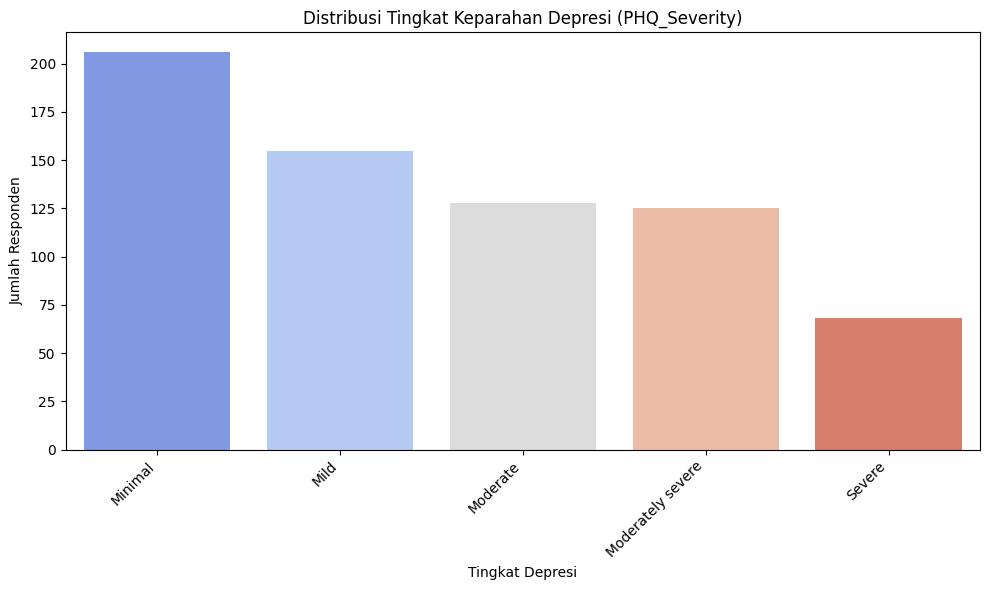

/tmp/ipython-input-2767851910.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_series.index, y=risk_series.values, palette='viridis')


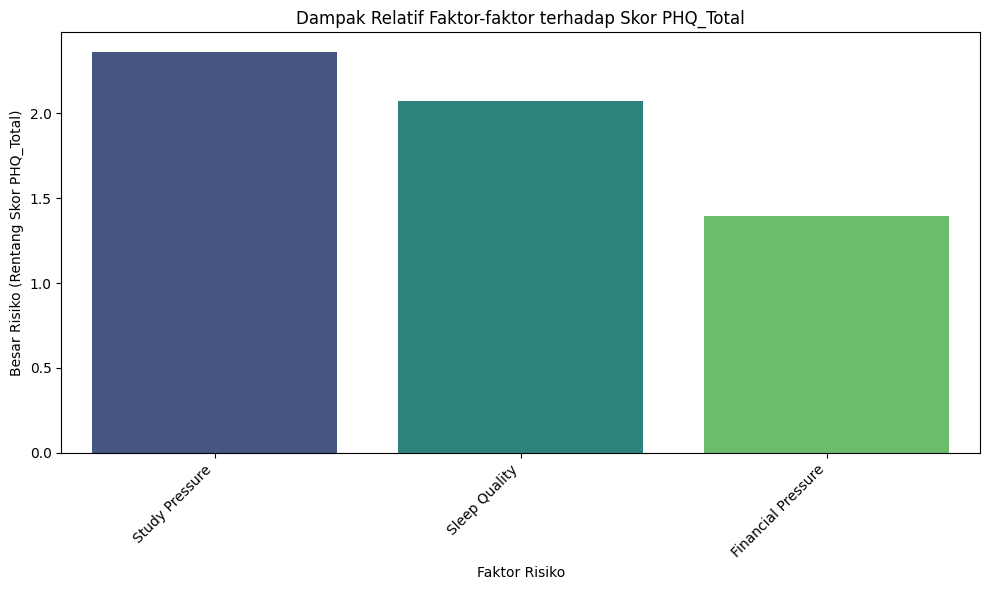

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualisasi Gender dengan Pie Chart
plt.figure(figsize=(8, 8))
gender_counts = df['Gender'].value_counts() # Pastikan gender_counts sudah dihitung
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender')
plt.axis('equal') # Memastikan pie chart berbentuk lingkaran
plt.savefig('gender_distribution_pie.png') # Menyimpan pie chart
plt.show()

# Visualisasi Usia dengan Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)

# Menambahkan garis vertikal untuk rata-rata usia (median)
median_age = df['Age'].median()
plt.axvline(median_age, color='red', linestyle='--', label=f'Median Usia: {median_age:.1f}')
plt.legend()

plt.savefig('age_distribution_histogram.png') # Menyimpan histogram
plt.show()

# Visualisasi Tingkat Depresi dengan Bar Chart
plt.figure(figsize=(10, 6))
severity_counts = df['PHQ_Severity'].value_counts() # Dapatkan jumlah terlebih dahulu
# Definisikan urutan yang diinginkan
desired_order = ['Minimal', 'Mild', 'Moderate', 'Moderately severe', 'Severe']
# Reindex Series untuk menerapkan urutan yang diinginkan
severity_counts = severity_counts.reindex(desired_order)
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
plt.title('Distribusi Tingkat Keparahan Depresi (PHQ_Severity)')
plt.xlabel('Tingkat Depresi')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('phq_severity_bar.png') # Menyimpan bar chart PHQ Severity
plt.show()

# Konversi impact_summary ke Series untuk visualisasi yang lebih mudah
risk_series = pd.Series(risk).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=risk_series.index, y=risk_series.values, palette='viridis')
plt.title('Dampak Relatif Faktor-faktor terhadap Skor PHQ_Total')
plt.xlabel('Faktor Risiko')
plt.ylabel('Besar Risiko (Rentang Skor PHQ_Total)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('risk_factors_bar.png') # Menyimpan bar chart Impact Factors
plt.show()